<a href="https://colab.research.google.com/github/Fikrimaulana25/laptop-price-/blob/main/laptop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split #For spliting data into 2 sets of train and test

from sklearn.feature_selection import mutual_info_classif #For calculating information gain

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df_raw = pd.read_csv("products.csv")
df_raw.head()

In [ ]:
%run -i 'DatasetProcessor.py'

In [27]:
df = pd.read_csv("fixed.csv")

In [ ]:
df.head()

In [ ]:
X_encoded = pd.get_dummies(df, columns=['CPUModel', 'CPUCompany','RAMTechnology'], drop_first=True)
X_encoded

In [ ]:
X_encoded = X_encoded.dropna()
X_encoded

In [ ]:
y = X_encoded['Price']
X_mic = X_encoded.drop(columns=['Price'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Gain')

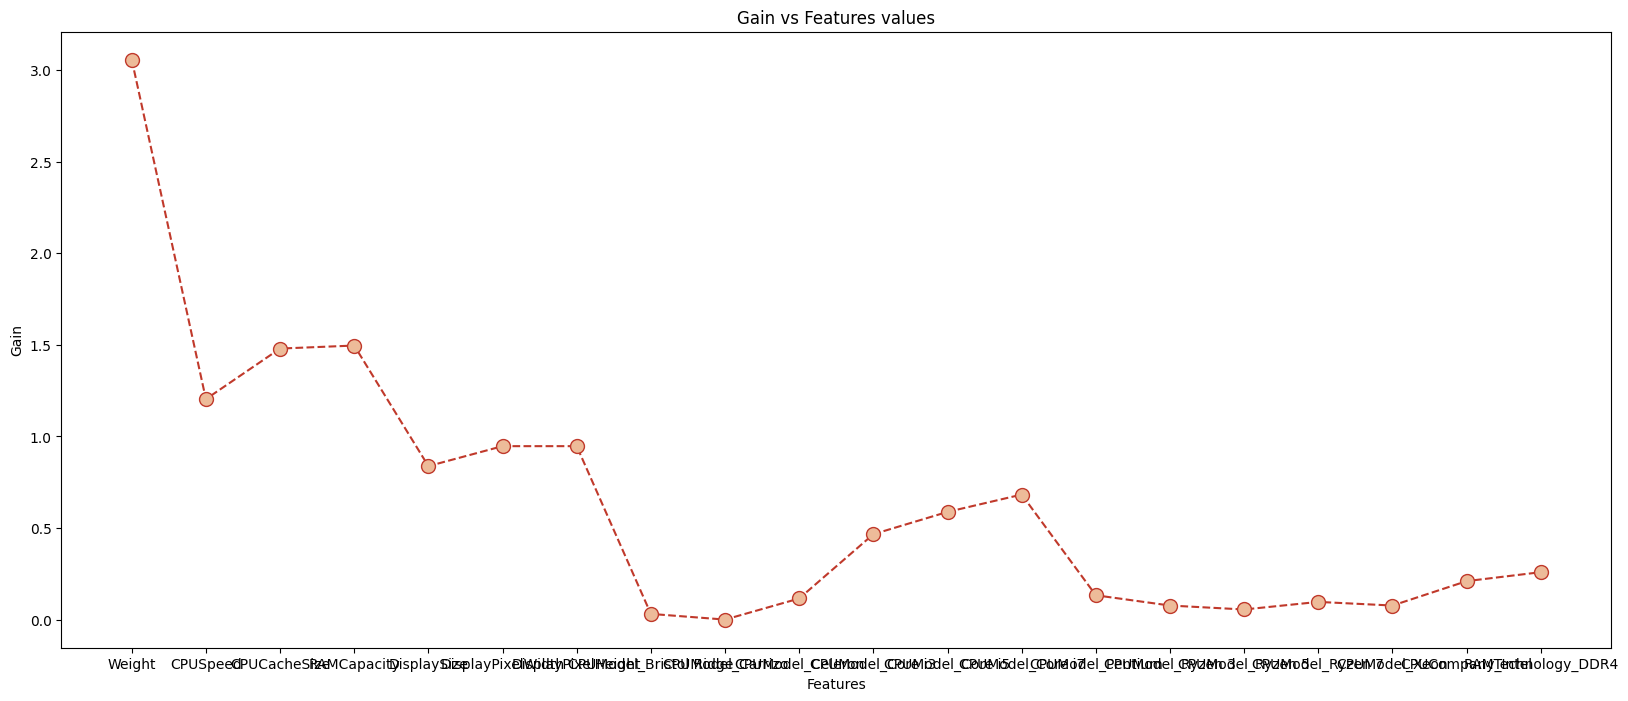

In [32]:
X_mic = X_mic.drop(columns=['ProductID'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

In [33]:
#seprating dataset for train and test
X_train , X_test ,y_train , y_test = train_test_split(X_mic,y, test_size=0.2, train_size=0.8, shuffle=True)

In [34]:
# preproccessing and normalization then fitting a model
# X_trainp = X_train.reshape(-1,1)
y_trainp = y_train.ravel()
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_trainp)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [35]:
coeffs = pd.DataFrame(reg.named_steps['sgdregressor'].coef_,X_mic.columns,columns=['Coefficient'])
coeffs

,Coefficient
Weight,1.003302e+06
CPUSpeed,-4.207901e+05
CPUCacheSize,1.278262e+07
RAMCapacity,8.014560e+06
DisplaySize,-2.501123e+06
DisplayPixelWidth,-2.780643e+06
DisplayPixelHeight,8.118415e+06
CPUModel_Bristol Ridge,1.106990e+06
CPUModel_Carrizo,0.000000e+00
CPUModel_Celeron,-6.994732e+05


In [36]:
# testing model
# X_testp = X_test.reshape(-1,1)
yhat = reg.predict(X_test)

In [37]:
# checking accuracy of model
reg.score(X_test,y_test)

0.8496241613684454

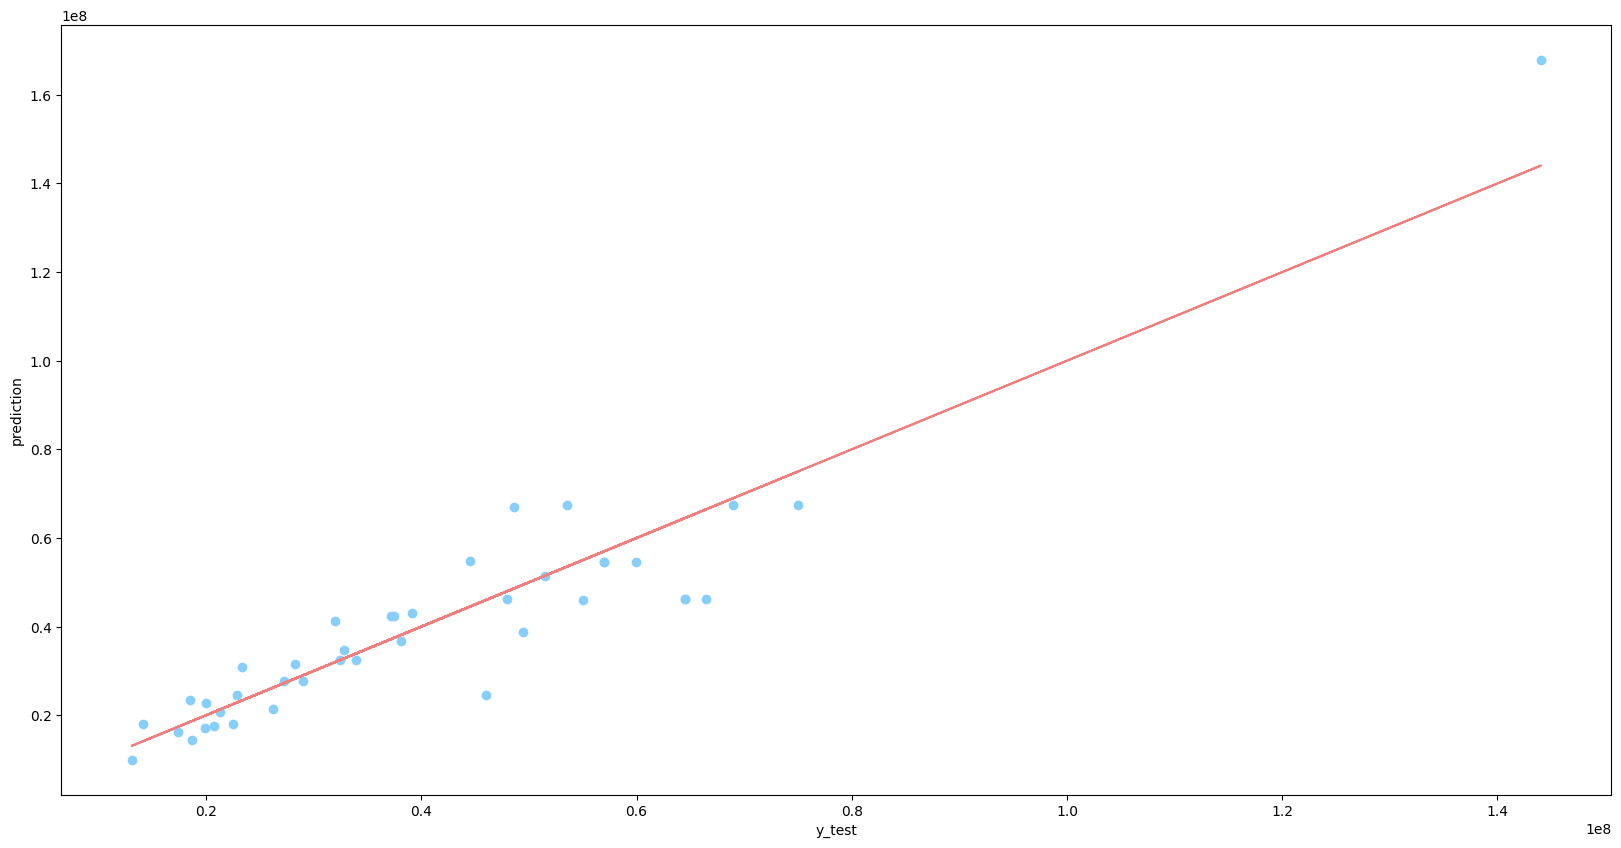

In [38]:
# ploting dataset and linear model together
plt.figure(figsize=(20,10))
plt.scatter(y_test,yhat, c = 'lightskyblue')
plt.ylabel("prediction")
plt.xlabel("y_test")
plt.plot(y_test,y_test, color='lightcoral')

In [39]:
#sample function for predictig price from given engine size
org_fields =['Weight','DisplaySize','DisplayPixelWidth','DisplayPixelHeight','CPUSpeed','CPUCacheSize','RAMCapacity']
def sample(data):
    temp = {}
    for col in X_mic.columns:
        temp.update({str(col):[0]})

    for k in temp.keys():
        if(k in org_fields):
            temp[k][0] = data[k]
        else:
            for i in ['CPUModel', 'CPUCompany','RAMTechnology']:
                if(data[i] in str(k)):
                    temp[k][0]=1


    x =pd.DataFrame(temp)
    price = reg.predict(x)
    return price[0]

In [40]:
data={'Weight':2.0,
      'DisplaySize':16.0,
      'DisplayPixelWidth':1920,
      'DisplayPixelHeight':1080,
      'CPUCompany':'Intel',
      'CPUModel':'Core i9',
      'CPUSpeed':3.0,
      'CPUCacheSize':16.0,
      'RAMCapacity':32,
      'RAMTechnology':'DDR4'
     }
sample(data)

86984731.94351825

In [41]:
#fairness function which indicates if the price is higher or lower than what it should be
def fairness(data,price,epsilon):
    pricehat = sample(data)
    if(abs(price - pricehat) <= epsilon*pricehat):
        print("fair")
    else:
        if(price > pricehat):
            print('more expensive')
        else:
            print('cheaper')

In [42]:
fairness(data,91522065,0.05)

more expensive
